# ABEL experiment tracking example

By Carl A. Lindstrøm (University of Oslo), 8 Sep 2023

### Import ABEL framework

In [1]:
from abel import *

Could not import HiPACE++ tools from /Users/ben_c/Library/CloudStorage/OneDrive-UniversitetetiOslo/Software/hipace/tools


### Define the input beams

In [2]:
# define drive bunch
driver = SourceBasic()
driver.charge = -2e-9 # [C]
driver.energy = 10e9 # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 20e-6 # [m]
driver.z_offset = 0e-6 # [m]
driver.emit_nx, driver.emit_ny = 20e-6, 20e-6 # [m rad]
driver.beta_x, driver.beta_y = 10e-3, 10e-3 # [m]
driver.num_particles = 500000
driver.symmetrize = True

# define witness bunch
witness = SourceBasic()
witness.charge = -0.5e-9 # [C]
witness.energy = 100e6 # [eV]
witness.rel_energy_spread = 0.01
witness.bunch_length = 5e-6 # [m]
witness.z_offset = -135e-6 # [m]
witness.emit_nx, witness.emit_ny = 10e-6, 10e-6 # [m rad]
witness.beta_x, witness.beta_y = 10e-3, 10e-3 # [m]
witness.num_particles = 100000
witness.x_offset, witness.y_offset = 10e-6, 0e-6 # [m]

# define rf linac
rf_accelerator = RFAcceleratorBasic()
rf_accelerator.nom_energy_gain = driver.energy - witness.energy
rf_accelerator.length = 1000 # [m]

# define beam delivery system
bds = BeamDeliverySystemBasic()
bds.beta_x = witness.beta_x # [m]
bds.beta_y = witness.beta_y # [m]

# define overall linac
linac = ConventionalLinac()
linac.source = witness
linac.rf_accelerator = rf_accelerator
linac.bds = bds

### Define the experimental setup

In [3]:
# define stage
stage = StageWakeT()
#stage = StageHipace()
stage.driver_source = driver
stage.nom_energy = 10.0e9 # [eV]
stage.nom_accel_gradient = 15e9 # [V/m]
stage.length = 0.05 # [m]
stage.plasma_density = 4e22 # [m^-3]

# for StageWakeT
#stage.use_single_beam = True  # Track main beam only

# for StageHipace
#stage.ion_motion = False
#stage.ion_species = 'He'
#stage.beam_ionization = False
#stage.num_nodes = 1

# define experiment
experiment = ExperimentPWFA()
experiment.linac = linac
experiment.stage = stage

### Perform linac tracking

In [4]:
# perform experiment tracking
beam = experiment.run('experiment_example', num_shots=1, overwrite=True)

Tracked #0  SourceBasic             (s =    0.0 m) :   E =   0.1 GeV, Q = -0.50 nC, σz =   5.0 µm, σE =  1.0%, ε =  10.0/10.0 mm-mrad
    ... #1  RFAcceleratorBasic      (s = 1000.0 m) :   E =  10.0 GeV, Q = -0.50 nC, σz =   5.0 µm, σE =  0.0%, ε =  10.0/10.0 mm-mrad
    ... #2  BeamDeliverySystemBasic (s = 1318.2 m) :   E =  10.0 GeV, Q = -0.50 nC, σz =   5.0 µm, σE =  0.0%, ε =  10.0/10.0 mm-mrad
Plasma stage: 100%|███████████████████████████████████████| 0.050000/0.050000 m [00:13]
    ... #3  StageWakeT #1           (s = 1318.2 m) :   E =  10.7 GeV, Q = -0.50 nC, σz =   5.0 µm, σE =  0.2%, ε =  10.0/10.0 mm-mrad


### Plot the wakefield

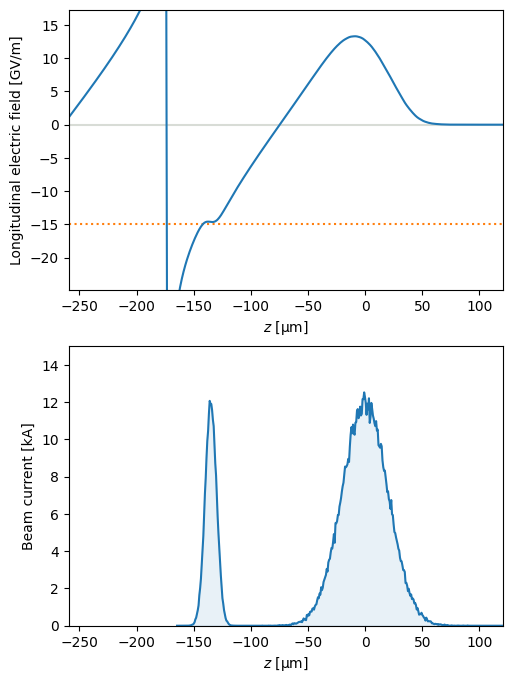

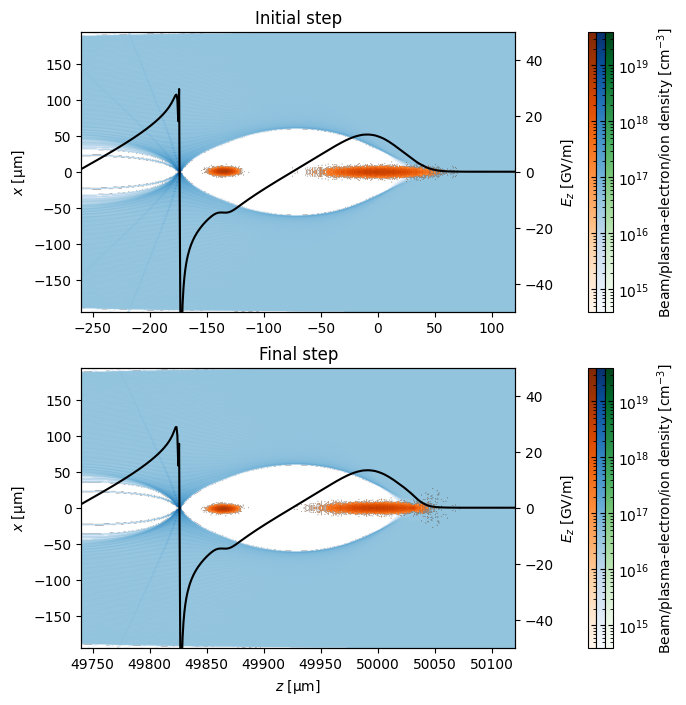

In [5]:
# plot wakefield
experiment.stage.plot_wakefield()
experiment.stage.plot_wake(aspect='auto')

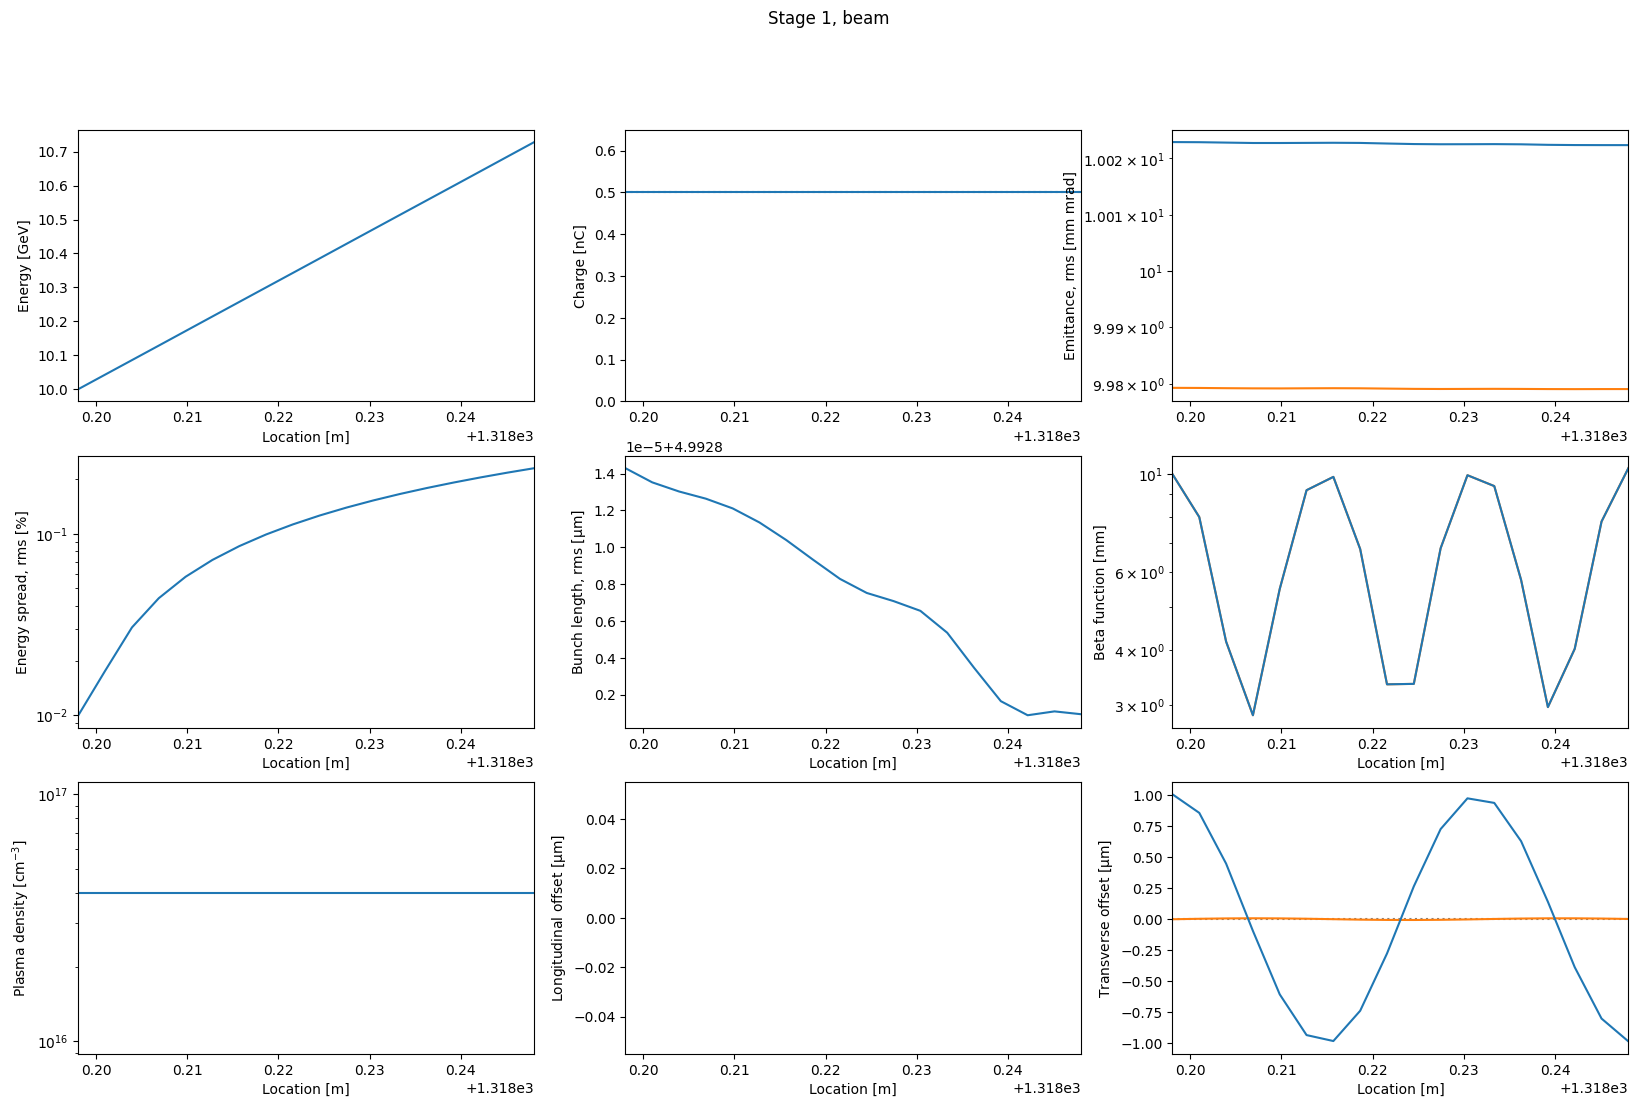

In [6]:
experiment.stage.plot_evolution()

### Plot longitudinal phase space

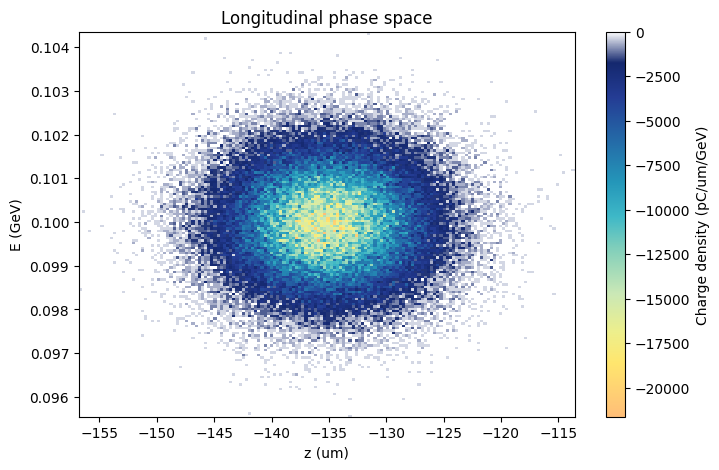

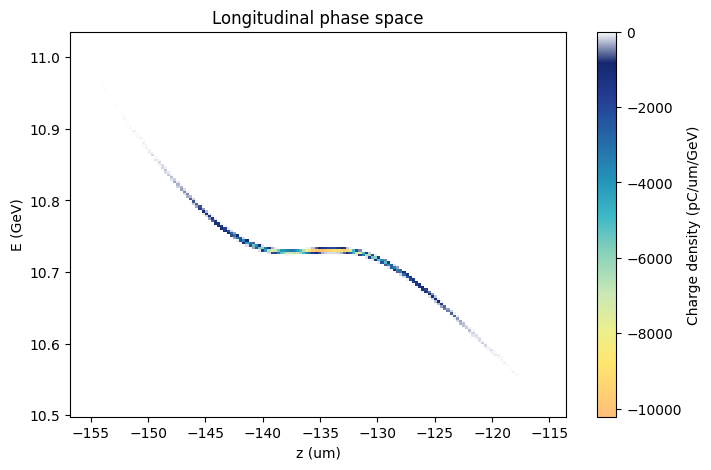

In [7]:
# plot the longitudinal phase space (before and after the PWFA)
experiment.get_beam(index=0).plot_lps()
experiment.get_beam(index=-1).plot_lps()